In [2]:
import plotly.express as px 
import matplotlib.pyplot as plt
import json
import utilities
import pandas as pd
import os
import csv

In [5]:
# Number of snapshots for each URL -- BOTH urls
url_snaps_fp = utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/CDX_api/dataframe/existing_fp_full_snapshots.json")
url_snaps_non_fp = utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/CDX_api/dataframe/existing_non_fp_full_snapshots.json")

num_snaps_df = pd.DataFrame(columns=['url_id', 'num_snapshots'])
num_snapshots_report = {}

for url_id, value in url_snaps_fp.items():
    num_snapshots_report[str(url_id)+"_fp"] = len(value['snapshots'])
print(len(num_snapshots_report))    
for url_id, value in url_snaps_non_fp.items():
    num_snapshots_report[str(url_id)+"_non-fp"] = len(value['snapshots'])

snapshots_report_df = pd.DataFrame.from_dict(set(num_snapshots_report.items()))
snapshots_report_df.columns = ['url_id', 'num_snapshots']

1174


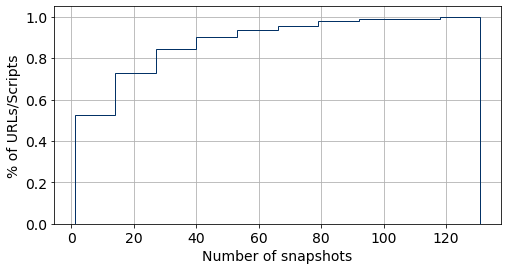

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

x = snapshots_report_df['num_snapshots']

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step', cumulative=True, color = '#033266')

#ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
        #label='Reversed emp.')

#tidy up the figure
ax.grid(True)
#ax.legend(loc='right')
#ax.set_title('Cumulative step histograms')
ax.set_xlabel('Number of snapshots')
ax.set_ylabel('% of URLs/Scripts')
plt.savefig("num_snapshots.png")
plt.show()